<a href="https://colab.research.google.com/github/7-4-7/AI-web-apps-/blob/main/Live%20Text%20Emotion%20Analyser/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Dataset

In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

#### Domain Libraries

- torchvision.datasets
- torchaudio.datasets
- torchrec.datasets
- torchtext.datasets


## 0. Importing Pytorch and device agnostic code


In [ ]:
import torch
from torch import nn

torch.__version__

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 1. Get data


Dataset subset of food 101 dataset

Our dataset has 3 classes and 10% images of original

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path('data/')
image_path = data_path / "pizza_steak_sushi" # AUtomatically creates a folder

if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)


# download data

with open(data_path / "pizza_steak_sushi.zip","wb") as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip') # blob -> raw
  print("Downloading Pizza Steak Sushi data...")
  f.write(request.content)

#Unzip

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping Pizza Steak Sushi data...")
  zip_ref.extractall(image_path)



Did not find data/pizza_steak_sushi directory, creating one...
Unzipping Pizza Steak Sushi data...


In [ ]:
image_path # Conten of zip fuke will go to this path

PosixPath('data/pizza_steak_sushi')

## 2. Data exploration and Data Viz

In [ ]:
import os

def walk_through_dir(dir_path):

  """ Walks thr dir_path return it's contents."""
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directoris and {len(filenames)} images in '{dirpath}'")


In [ ]:
walk_through_dir(image_path)

There are 2 directoris and 0 images in 'data/pizza_steak_sushi'
There are 3 directoris and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directoris and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 directoris and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directoris and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 3 directoris and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directoris and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 directoris and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directoris and 78 images in 'data/pizza_steak_sushi/train/pizza'


In [ ]:
# Setup train and testing path

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
list(os.walk(train_dir))

[('data/pizza_steak_sushi/train', ['steak', 'sushi', 'pizza'], []),
 ('data/pizza_steak_sushi/train/steak',
  [],
  ['3727491.jpg',
   '234626.jpg',
   '225990.jpg',
   '2254705.jpg',
   '2013535.jpg',
   '3857508.jpg',
   '1937872.jpg',
   '355715.jpg',
   '2287136.jpg',
   '1976160.jpg',
   '1966300.jpg',
   '1598345.jpg',
   '2087958.jpg',
   '1849463.jpg',
   '2606444.jpg',
   '1257104.jpg',
   '2628106.jpg',
   '3142045.jpg',
   '937133.jpg',
   '97656.jpg',
   '2129685.jpg',
   '2017387.jpg',
   '2880035.jpg',
   '560503.jpg',
   '1761285.jpg',
   '1413972.jpg',
   '2163079.jpg',
   '167069.jpg',
   '3142674.jpg',
   '2707522.jpg',
   '214320.jpg',
   '1647351.jpg',
   '1615395.jpg',
   '3074367.jpg',
   '2629750.jpg',
   '2878151.jpg',
   '443210.jpg',
   '339891.jpg',
   '1736968.jpg',
   '165639.jpg',
   '1839481.jpg',
   '2648423.jpg',
   '2825100.jpg',
   '2614649.jpg',
   '1621763.jpg',
   '3727036.jpg',
   '922752.jpg',
   '176508.jpg',
   '100135.jpg',
   '482022.jpg',
  

### 2.1 Visualizing and image

* get all image paths
* randomly choose one image path
* get class name `pathlib.Path.parent.stem`
* Open Image - > PIL
* `plt.imshow()`

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

data/pizza_steak_sushi/test/pizza/309892.jpg
pizza
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x333 at 0x7B83D49A2110>
Random image path : data/pizza_steak_sushi/test/pizza/309892.jpg
Image class : pizza
Image height : 333
Image width : 512


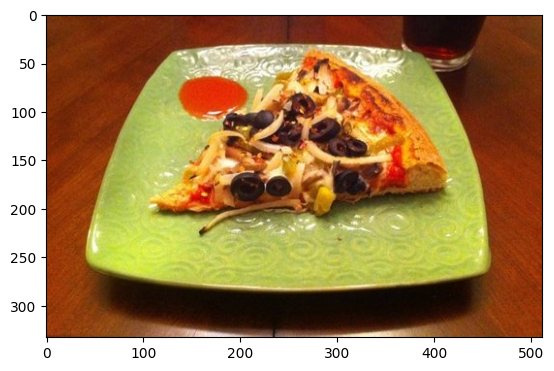

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt

# Set Seed
#random.seed(42)

# 1. Get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

len(image_path_list) # 300

# 2. Select random image from all images form image_path
random_img_path = random.choice(image_path_list)
print(random_img_path)

# 3. Get image class from path name
img_class = random_img_path.parent.stem
print(img_class)

# 4. Open images
image = Image.open(random_img_path) # If corrupt ERROR
print(image)

# meta-data
print(f"Random image path : {random_img_path}")
print(f"Image class : {img_class}")
print(f"Image height : {image.height}")
print(f"Image width : {image.width}")

# 5. Plot the image
plt.imshow(image)
plt.show()




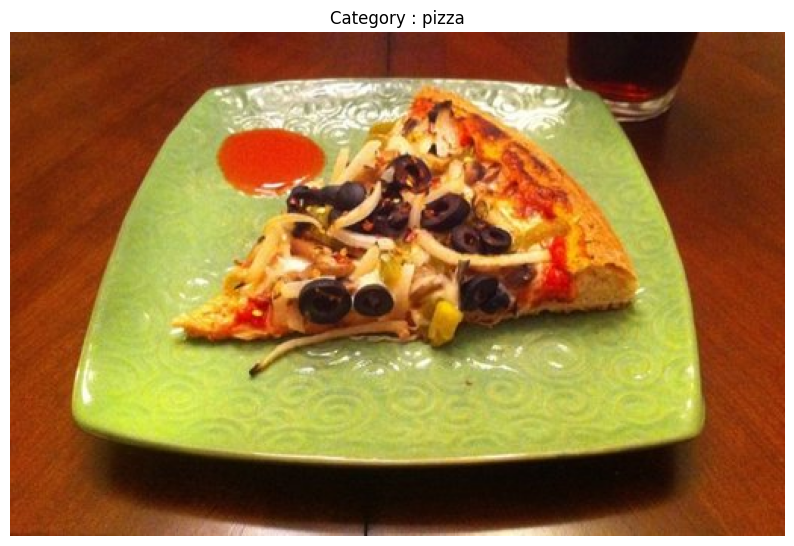

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn img into array
img_as_array = np.asarray(image)

plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f"Category : {img_class}")
plt.axis(False)
plt.show()

## 3. Transforming Data

- `ToTensors()`
- `torch.utils.data.Dataset` || Dataset
- `torch.utils.data.DataLoader` || Dataloader



In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

#### 3.1 torchvison.transforms

In [ ]:
data_transform = transforms.Compose([
    # Resize
    transforms.Resize(size=(64,64)),
    # Flip images
    transforms.RandomHorizontalFlip(p = 0.69),
    # ToTensor()
    transforms.ToTensor() # PIL array or np.array to tensor🙂 normalized? YESS
]
) # or nn.sequential

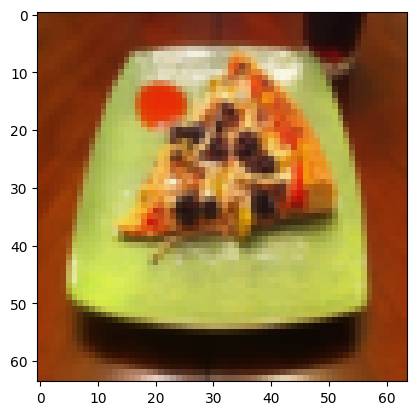

In [ ]:
plt.imshow(data_transform(image).permute(1,2,0).numpy())
plt.show()

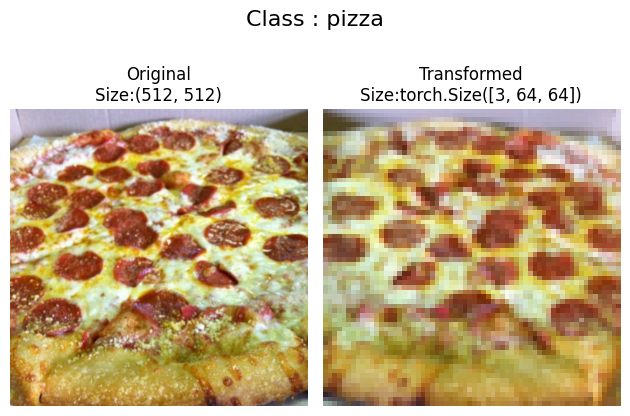

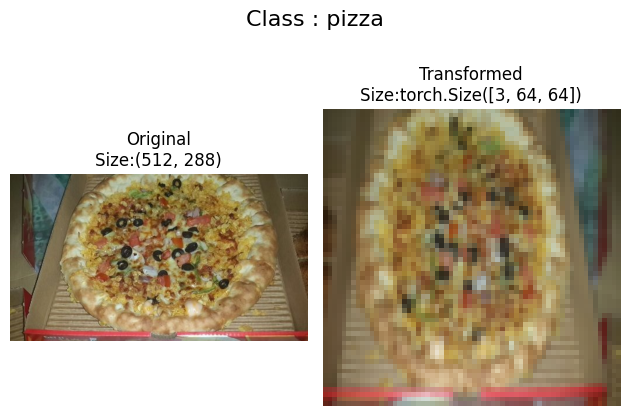

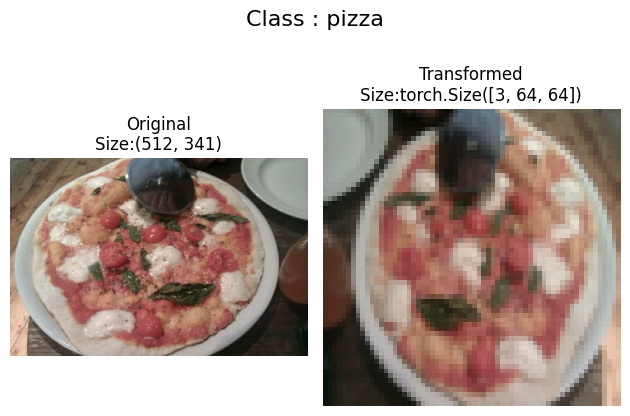

In [ ]:
def plot_transformed_images(image_paths:list,transform,n =3,seed = None ):

  """ Selects a random images from a path of images and laods/transforms thme then plots the original vs transformed version """
  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths: # Each time differnet figure
    with Image.open(image_path) as f: # How to open images using PIL and with
      fig,ax = plt.subplots(nrows=1,ncols=2)

      # 0th dim orignial
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize:{f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f) # NOTE THIS
      ax[1].imshow(transformed_image.permute(1,2,0).numpy())
      ax[1].set_title(f"Transformed\nSize:{transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class : {image_path.parent.stem}",fontsize = 16) # Title of figure

      fig.tight_layout()
      plt.show()


plot_transformed_images(
    image_path_list,
    transform = data_transform,
    n = 3,
    seed = 0
)


In [ ]:
image_path_list

[PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1302563.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3873283.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2144308.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1627703.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_su

## 4. Option 1 : Loading image data using `ImageFolder`

Each domain has spefic data loading dataset

For vision problems there are 2-3

ImageFolder requires the data to be in specidal sstructuire

In [ ]:
from torchvision.datasets import ImageFolder

train_data = ImageFolder(
    root = train_dir,
    transform = data_transform, # Transform for the data
    target_transform=None # Transforms for labels
)

test_data = ImageFolder(
    root = test_dir,
    transform = data_transform,
    target_transform=None,
)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.69)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.69)
                ToTensor()
            ))

In [ ]:
225/3

75.0

In [ ]:
# Get class names as list
train_data.classes # LIST


['pizza', 'steak', 'sushi']

In [ ]:
# Get class name as divtion
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
train_data.extensions??

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [ ]:
# Index on the train data dataset to get sinfle image and label

train_data[0][0].shape

torch.Size([3, 64, 64])

In [ ]:
len(train_data)

225

In [ ]:
img,label = train_data[178]
img.shape,label

(torch.Size([3, 64, 64]), 2)

In [ ]:
class_names = train_data.classes
class_names[label]

'sushi'

In [ ]:
print(f"Image tensor : \n {img}")
print(f"Image shape : {img.shape}")
print(f"Image height : {img.shape[1]}")
print(f"Image width : {img.shape[2]}")
print(f"Image Datatype : {img.dtype}")
print(f"Label : {label}")
print(f"Class name : {class_names[label]}")
print(f"Label type : {type(label)}")

Image tensor : 
 tensor([[[0.1412, 0.1412, 0.1451,  ..., 0.2941, 0.4039, 0.4196],
         [0.1373, 0.1373, 0.1412,  ..., 0.1765, 0.3529, 0.4235],
         [0.1412, 0.1333, 0.1412,  ..., 0.2980, 0.3882, 0.4157],
         ...,
         [0.6863, 0.6980, 0.7137,  ..., 0.1333, 0.1020, 0.0824],
         [0.6824, 0.6941, 0.7059,  ..., 0.1176, 0.0863, 0.0627],
         [0.6745, 0.6863, 0.6980,  ..., 0.1137, 0.0824, 0.0549]],

        [[0.0784, 0.0784, 0.0784,  ..., 0.2627, 0.3608, 0.3804],
         [0.0784, 0.0784, 0.0745,  ..., 0.1490, 0.3098, 0.3686],
         [0.0784, 0.0745, 0.0745,  ..., 0.2235, 0.3098, 0.3412],
         ...,
         [0.5882, 0.5961, 0.6078,  ..., 0.0980, 0.0824, 0.0706],
         [0.5843, 0.5922, 0.6000,  ..., 0.0863, 0.0627, 0.0510],
         [0.5804, 0.5882, 0.5922,  ..., 0.0745, 0.0549, 0.0431]],

        [[0.0588, 0.0588, 0.0549,  ..., 0.0745, 0.0824, 0.0824],
         [0.0588, 0.0510, 0.0510,  ..., 0.0588, 0.0863, 0.1059],
         [0.0549, 0.0510, 0.0510,  ..., 0

In [ ]:
img_permute = img.permute(1,2,0).numpy()
img_permute.shape # Compatible to matplotlib

(64, 64, 3)

In [ ]:
img_permute

array([[[0.14117648, 0.07843138, 0.05882353],
        [0.14117648, 0.07843138, 0.05882353],
        [0.14509805, 0.07843138, 0.05490196],
        ...,
        [0.29411766, 0.2627451 , 0.07450981],
        [0.40392157, 0.36078432, 0.08235294],
        [0.41960785, 0.38039216, 0.08235294]],

       [[0.13725491, 0.07843138, 0.05882353],
        [0.13725491, 0.07843138, 0.05098039],
        [0.14117648, 0.07450981, 0.05098039],
        ...,
        [0.1764706 , 0.14901961, 0.05882353],
        [0.3529412 , 0.30980393, 0.08627451],
        [0.42352942, 0.36862746, 0.10588235]],

       [[0.14117648, 0.07843138, 0.05490196],
        [0.13333334, 0.07450981, 0.05098039],
        [0.14117648, 0.07450981, 0.05098039],
        ...,
        [0.29803923, 0.22352941, 0.10980392],
        [0.3882353 , 0.30980393, 0.14509805],
        [0.41568628, 0.34117648, 0.15686275]],

       ...,

       [[0.6862745 , 0.5882353 , 0.3882353 ],
        [0.69803923, 0.59607846, 0.39215687],
        [0.7137255 , 0

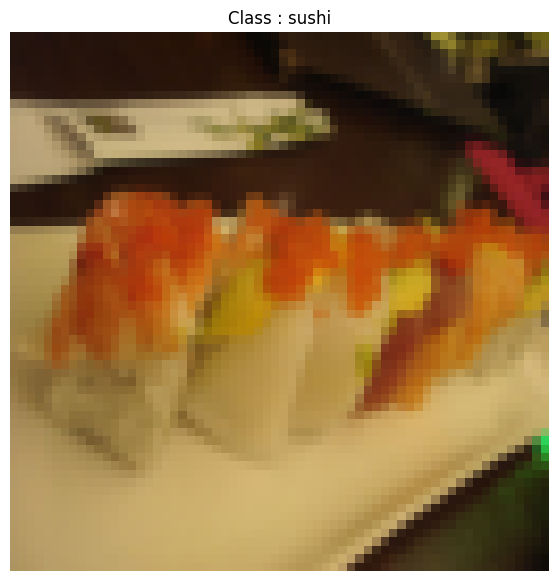

In [ ]:
# Plot image
plt.figure(figsize = (10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(f"Class : {class_names[label]}")
plt.show()

### 4.1 TUrn loaded imafes into Dataloaders

Dataloader converts the dataset to iterable object

In [ ]:
os.cpu_count()

2

In [ ]:
os.dup

<function posix.dup(fd, /)>

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    num_workers = os.cpu_count(), # How many cpu c
    shuffle = True,
)


test_dataloader = DataLoader(
    dataset=test_data,
    batch_size = BATCH_SIZE,
    num_workers = os.cpu_count(),
    shuffle = False
)

In [ ]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b83c2a45e50>,
 <torch.utils.data.dataloader.DataLoader at 0x7b83c27ab810>)

In [ ]:
len(train_dataloader),len(test_dataloader) # Batch size


(225, 75)

In [ ]:
img,label = next(iter(train_dataloader))
print(f"Size of image [B,C,H,W] : {img.shape}\nLabel : {label}")

Size of image [B,C,H,W] : torch.Size([1, 3, 64, 64])
Label : tensor([2])


## 5 Loading Image data with cusotom `Dataset`

Freedom

requiremensts
  1. Load images from file
  2. class names from the Dataset
  3. classes as dictionsry

Pros:
* Freedom
* Any dataset

Cons:
* Manually figuring out things
* Doesnot mean it will work
* Results us in writing more code can leasd to bottlenecks or performance issues


**NOTE** : Custom datsets are subclassed by Dataset

In [ ]:
from torch.utils.data import Dataset
import os
import pathlib
import torch
from PIL import Image
from torchvision import transforms
from typing import Tuple,Dict,List # For type hints*

In [ ]:
# Instance of Image/Folder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper fn to get class names

We want a function to :
1. Get class names -> `os.scandir()`
2. Raise error if class names not found
3. Turn the class names into dict and list and return them

In [ ]:
# target directory

target_directory = train_dir
target_directory
print(f"Target dir: {target_directory}")

# Class names from target directory
class_names = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
list(os.scandir(target_directory))

[<DirEntry 'steak'>, <DirEntry 'sushi'>, <DirEntry 'pizza'>]

In [ ]:
os.scandir(target_directory)

In [ ]:
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
  """
  Finds the class names in a target directory
  """

  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # Raise error if class name not found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}....Check file structure")


  # Create a dictionray with labels
  class_to_idx = {cls_name:i for i,cls_name in enumerate(classes)}

  return classes,class_to_idx


In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom dataset to replicate `ImageFolder`

1. Overwrite `__getitem__()`
2. Overwrite `__len__()`
3. 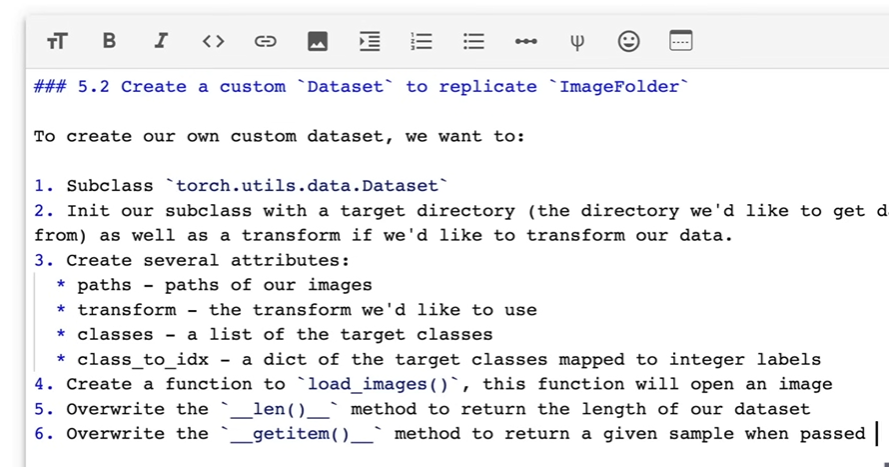

In [ ]:
# A custom dataset
# 0. Import dataset
from torch.utils.data import Dataset

# 1.0 Subclass
class ImageFolderCustom(Dataset):
  # 2.0 init method(dir,trandofms)
  # We ogonna pass train or test folder

  def __init__(self,targ_dir:str,transform = None):

    # Create class attr
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))

    # Setup transforms
    self.transform = transform
    #Create classes and class_to_idx attributes

    self.classes,self.class_to_idx = find_classes(targ_dir)

  # Create a function to load image
  def load_image(self,index:int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # Overwrite __len__()
  def __len__(self) -> int:

    """Returns total nubmber of samples"""
    return len(self.paths)

  # Overwreite __getitem__()
  def __getitem__(self, index) -> Tuple[torch.Tensor,int]:

    """Returns one sample of data and lable"""
    img = self.load_image(index)
    class_names = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_names]

    if self.transform:
      return self.transform(img),class_idx # Return
    else:
      return img,class_idx

In [ ]:
img,label = train_data[0]

In [ ]:
label

0

In [ ]:
img.shape

torch.Size([3, 64, 64])

In [ ]:
class_names[label]

'pizza'

In [ ]:
# Create a transform

from torchvision import transforms

train_transforms = transforms.Compose(
    [
        transforms.Resize((64,64)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor() # PIL to Tnensor
    ]
)

# TYpically we don't comvert or augment ouur test data
test_transforms = transforms.Compose(
    [
        transforms.Resize((64,64)),
        transforms.ToTensor() # PIL to Tnensor
    ]
)

In [ ]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [ ]:
# Test out ImageFOlderCustoe

train_data_custom = ImageFolderCustom(
    targ_dir = train_dir,
    transform = train_transforms
)

test_data_custom = ImageFolderCustom(
    targ_dir = test_dir,
    transform = test_transforms
)

In [ ]:
train_data_custom

In [ ]:
len(train_data),len(train_data_custom)

(225, 225)

In [ ]:
len(test_data),len(test_data)

(75, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check for equality b/w orignal ImageFOlder Dataset and IMmageFolderCUstomDataset

print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True


### 5.3 Create  a function to display random images

1. Take in a `Dataset` and other parameters such as class names and n imaages to viz`
2. To prevent the display getting out of hand, max = 5/10
3. torch.n=manuak_seed(42)
4. list of random sample indexes form targ dataset
5. Use matplotlib (
6. Plot the images
7.

In [ ]:
def display_random_images(
    dataset:torch.utils.data.Dataset,
    classes: List[str] = None,
    n:int = 10,
    display_shape:bool = True,
    seed: int = None):
  """
  """

  if n>10:
    n = 10
    display_shape = False
    print(f"Changed the display shape to False since n={n} is greater than 10")

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)),k=n)

  plt.figure(figsize = (16,8))

  for i,targ_sample in enumerate(random_samples_idx):

    targ_image,targ_label = dataset[targ_sample][0],dataset[targ_sample][1]

    targ_image_adj = targ_image.permute(1,2,0)

    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adj.numpy())
    plt.axis(False)

    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title + f" \nshape: {targ_image_adj.shape}"
    plt.title(title)



Changed the display shape to False since n=10 is greater than 10


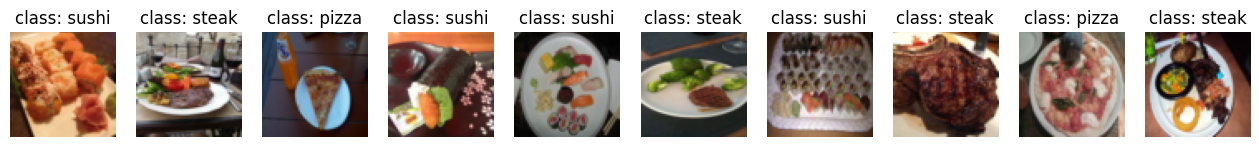

In [ ]:
display_random_images(train_data_custom,classes = train_data_custom.classes,n=23
                      )

### 5.4 Turns custom loaded images into `Dataloader`

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(
    dataset = train_data_custom,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,# How many cores load your data
    shuffle = True
)

test_dataloader_custom = DataLoader(
    dataset = test_data_custom,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = False
)




In [ ]:
# Get image and label from custom datalaoder

img_custom,label_custom = next(iter(train_dataloader_custom))

In [ ]:
img_custom.shape

torch.Size([1, 3, 64, 64])

In [ ]:
len(train_dataloader_custom),len(train_dataloader)

(225, 225)

## 6. Others forms of transforms data augmentation

In [ ]:
# trivialaugment

from torchvision import transforms
train_transform = transforms.Compose(
    [
      transforms.Resize(size=(224,224)),
      transforms.TrivialAugmentWide(num_magnitude_bins=31), # How intense we want to augment,
      transforms.ToTensor()
    ]
)

test_transforms = transforms.Compose(
    [
        transforms.Resize((64,64)),
        transforms.ToTensor() # PIL to Tnensor
    ]
)

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
image_path_list = list(image_path.glob('*/*/*.jpg'))

In [ ]:
len(image_path_list)

300

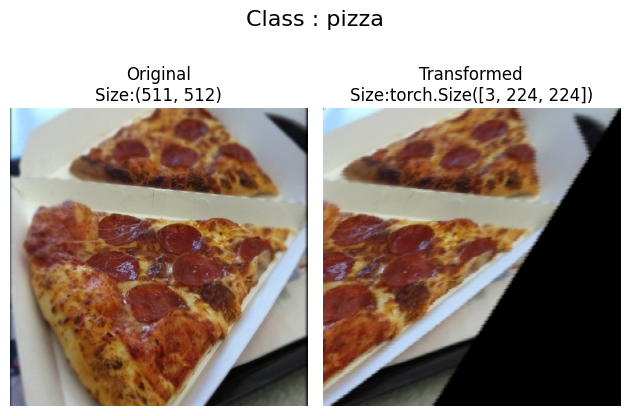

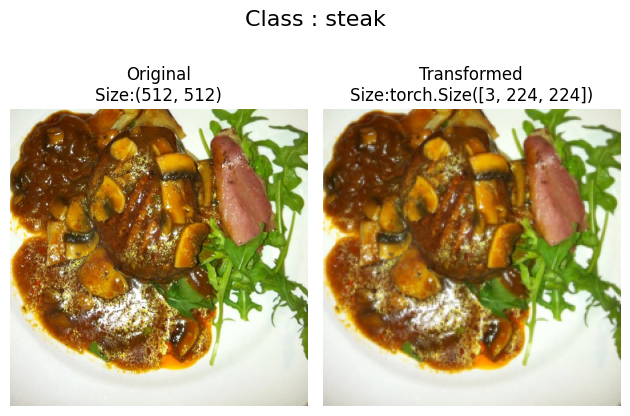

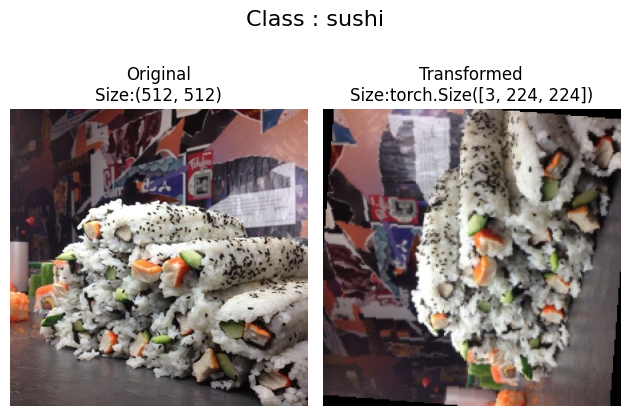

In [ ]:
plot_transformed_images(
    image_paths = image_path_list,
    transform = train_transform,
    n = 3,
)

## 7. Model 0 Tiny VGG architecture -? Base;ine model without data augmentation

### 7.1 Creating transforms and laoding data for model_0

In [ ]:
# Create simple transforms
simple_transform = transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
        transforms.ToTensor()
    ]
)


In [ ]:
# Load data and transform data

from torchvision import datasets

train_data_simple = datasets.ImageFolder(
    root = train_dir,
    transform = simple_transform,
    target_transform = None
)

test_data_simple = datasets.ImageFolder(
    root = test_dir,
    transform = simple_transform,
    target_transform = None
)


# Dataset to datloader

import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Train Dataloader simple
train_dataloader_simple = DataLoader(
    dataset = train_data_simple,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = True
)

test_dataloader_simple = DataLoader(
    dataset = test_data_simple,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    shuffle = False
)

In [ ]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

### 7.2 Create timny vgg nodel


In [ ]:
class TinyVGG(nn.Module):
  """
  Creates the TinyVGG architecture.

  Replicates the TinyVGG architecture from CNN EXPLAINER
  """

  def __init__(self,input_shape:int,hidden_units:int,output_shape:int) -> None:
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),

        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride = 2,
        )
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),

        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride = 2,
        )
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape) # ERROR

    return x # Operator Fusion

In [ ]:
model_0 = TinyVGG(
    input_shape = 3,
    hidden_units = 10,
    output_shape = len(class_names)
).to(device)

In [ ]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a dummy foward pass for single image

In [ ]:
# Forward pass for dummy pass

image_batch , label_batch = next(iter(train_dataloader_simple))
image_batch.shape


torch.Size([32, 3, 64, 64])

In [ ]:
image_batch.device # Change to cpu

device(type='cpu')

In [ ]:
32*10*16*16

81920

In [ ]:
10*16*16

2560

In [ ]:
model_0(image_batch.to(device)) # A batch can be passed to the model as well

tensor([[0.0161, 0.0309, 0.0222],
        [0.0216, 0.0359, 0.0210],
        [0.0211, 0.0339, 0.0220],
        [0.0239, 0.0364, 0.0194],
        [0.0221, 0.0334, 0.0225],
        [0.0197, 0.0319, 0.0192],
        [0.0238, 0.0307, 0.0186],
        [0.0228, 0.0321, 0.0175],
        [0.0223, 0.0314, 0.0192],
        [0.0215, 0.0339, 0.0222],
        [0.0202, 0.0307, 0.0225],
        [0.0197, 0.0340, 0.0253],
        [0.0195, 0.0314, 0.0199],
        [0.0239, 0.0360, 0.0180],
        [0.0227, 0.0311, 0.0195],
        [0.0210, 0.0342, 0.0229],
        [0.0209, 0.0347, 0.0205],
        [0.0237, 0.0332, 0.0186],
        [0.0205, 0.0354, 0.0256],
        [0.0223, 0.0331, 0.0205],
        [0.0179, 0.0342, 0.0172],
        [0.0243, 0.0355, 0.0208],
        [0.0204, 0.0343, 0.0226],
        [0.0242, 0.0348, 0.0192],
        [0.0206, 0.0348, 0.0228],
        [0.0228, 0.0320, 0.0175],
        [0.0237, 0.0323, 0.0212],
        [0.0233, 0.0336, 0.0208],
        [0.0213, 0.0351, 0.0218],
        [0.020

In [ ]:
image_batch.to(device)

tensor([[[[0.9333, 0.9216, 0.8941,  ..., 0.9098, 0.9412, 0.9490],
          [0.9294, 0.6863, 0.4314,  ..., 0.5608, 0.8941, 0.9451],
          [0.8824, 0.4235, 0.7098,  ..., 0.1765, 0.7451, 0.9451],
          ...,
          [0.8431, 0.2588, 0.0392,  ..., 0.5333, 0.6157, 0.9451],
          [0.8588, 0.2784, 0.0431,  ..., 0.5451, 0.6745, 0.9490],
          [0.8902, 0.3529, 0.0471,  ..., 0.5412, 0.7490, 0.9490]],

         [[0.9333, 0.9216, 0.8980,  ..., 0.9137, 0.9412, 0.9490],
          [0.9294, 0.6745, 0.4275,  ..., 0.5608, 0.8941, 0.9451],
          [0.8824, 0.4196, 0.7255,  ..., 0.1843, 0.7451, 0.9451],
          ...,
          [0.8392, 0.2431, 0.0314,  ..., 0.5490, 0.6196, 0.9529],
          [0.8588, 0.2667, 0.0392,  ..., 0.5608, 0.6745, 0.9529],
          [0.8863, 0.3412, 0.0392,  ..., 0.5529, 0.7451, 0.9529]],

         [[0.9255, 0.9137, 0.8824,  ..., 0.9137, 0.9412, 0.9490],
          [0.9216, 0.6706, 0.4235,  ..., 0.5569, 0.8941, 0.9490],
          [0.8784, 0.4275, 0.7255,  ..., 0

In [ ]:
image_batch.device

device(type='cpu')

In [ ]:
!pip install torchinfo

### 7.4 Use torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
summary(model_0,input_size = [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
summary(model_0,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## 7.5 Craete train and test loops functions

* `train_step()` take sin model and dataloader and trains the model on dataloader
* `test_step()` - takes in a model and dataloader and evaluate the model on the dataloader


In [ ]:
def train_step(
    model:torch.nn.Module,
    dataloader : torch.utils.data.DataLoader,
    loss_fn : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    device : device):

  model.train()

  train_loss,train_acc = 0 , 0

  # Loop through data loader

  for batch,(X,y) in enumerate(dataloader):

    # Send data to device
    X,y = X.to(device),y.to(device) # Sending tha data to GPU or CPU

    y_pred = model(X) # Model Logits

    loss = loss_fn(y_pred,y)

    train_loss += loss.item() # .item() can be used if and only if the tensor has single element * something to keep in mind
    # metrics accumulated over batch

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred,dim = 1),dim=1)

    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # AVerage per batch
  train_loss = train_loss/len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss,train_acc


In [ ]:
# Create a test step

def test_step(
    model:torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    device:device,):

  model.eval()

  test_loss,test_acc = 0,0

  with torch.inference_mode(): # Turn of gradient tracking
    for batch,(X,y) in enumerate(dataloader):

      X,y = X.to(device),y.to(device)

      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits,y) # Handles softmax calculation internallly

      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim = 1)

      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)

  return test_loss,test_acc





In [ ]:
a = torch.tensor([1,2,3]).to(device)

In [ ]:
a

tensor([1, 2, 3], device='cuda:0')

In [ ]:
# a.item()
a.tolist() # CPU autmoatic device conversion


[1, 2, 3]

In [ ]:
for batch,i  in enumerate(range(10)):
  print(batch,i)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [ ]:
for batch,i  in zip(range(10,1,-1),range(11)):
  print(batch,i)

10 0
9 1
8 2
7 3
6 4
5 5
4 6
3 7
2 8


In [ ]:
!pip install uv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 47.7 MB/s eta 0:00:00


In [ ]:
%time
!uv pip install --prerelease disallow transformers

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.3 µs
Using Python 3.11.12 environment at: /usr
Audited 1 package in 175ms


In [ ]:
!pip uninstall transformers

Found existing installation: transformers 4.51.1
Uninstalling transformers-4.51.1:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.11/dist-packages/transformers-4.51.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/transformers/*
Proceed (Y/n)? N


In [ ]:
%time
!pip install transformers

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [ ]:
from tqdm.auto import tqdm

In [ ]:
def train(
    model:torch.nn.Module,
    train_dataloader : torch.utils.data.DataLoader,
    test_dataloader : torch.utils.data.DataLoader,
    optimizer : torch.optim.Optimizer,
    device  = device,
    loss_fn : torch.nn.Module = nn.CrossEntropyLoss(),
    epochs : int = 10):

  results = {
      "train_loss" : [],
      "train_acc" : [],
      "test_loss" : [],
      "test_acc" : [],
  }

  for epoch in tqdm(range(epochs)):

    # Train Step
    train_loss,train_acc = train_step(
        model= model,
        dataloader = train_dataloader,
        loss_fn = loss_fn,
        optimizer = optimizer,
        device = device)

    # Test Step
    test_loss , test_acc = test_step(
        model = model,
        dataloader = test_dataloader,
        loss_fn = loss_fn,
        device = device)

    print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

### 7.7 Train and evaluate model_0

In [ ]:
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# Set number of epochs

EPOCHS = 60

model_0 = TinyVGG(
    input_shape = 3,
    hidden_units = 10,
    output_shape=len(train_data.classes)
).to(device)


loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model_0.parameters(),lr = 0.001) # Adams default leanring rate 1e-3

# Timer

from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(
    model = model_0,
    train_dataloader=train_dataloader_simple,
    test_dataloader = test_dataloader_simple,
    loss_fn = loss_fn,
    optimizer=optimizer,
    epochs = EPOCHS,
    device = device)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/60 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 1.1192 | Train Acc: 0.2812 | Test Loss: 1.1004 | Test Acc: 0.1979
Epoch: 2 | Train Loss: 1.0989 | Train Acc: 0.3086 | Test Loss: 1.0746 | Test Acc: 0.5417
Epoch: 3 | Train Loss: 1.0894 | Train Acc: 0.4336 | Test Loss: 1.0875 | Test Acc: 0.2604
Epoch: 4 | Train Loss: 1.0850 | Train Acc: 0.4258 | Test Loss: 1.1193 | Test Acc: 0.2604
Epoch: 5 | Train Loss: 1.1281 | Train Acc: 0.3047 | Test Loss: 1.1304 | Test Acc: 0.2604
Epoch: 6 | Train Loss: 1.1114 | Train Acc: 0.3047 | Test Loss: 1.1023 | Test Acc: 0.2604
Epoch: 7 | Train Loss: 1.0975 | Train Acc: 0.3047 | Test Loss: 1.0987 | Test Acc: 0.2604
Epoch: 8 | Train Loss: 1.0985 | Train Acc: 0.3047 | Test Loss: 1.0944 | Test Acc: 0.5417
Epoch: 9 | Train Loss: 1.0985 | Train Acc: 0.2812 | Test Loss: 1.0952 | Test Acc: 0.5417
Epoch: 10 | Train Loss: 1.0975 | Train Acc: 0.4180 | Test Loss: 1.0975 | Test Acc: 0.1979
Epoch: 11 | Train Loss: 1.1008 | Train Acc: 0.2969 | Test Loss: 1.1017 | Test Acc: 0.1979
Epoch: 12 | Train L

In [ ]:
model_0_results

{'train_loss': [1.119225636124611,
  1.0989333242177963,
  1.0893958359956741,
  1.0850162655115128,
  1.1281320452690125,
  1.1114244014024734,
  1.0975423455238342,
  1.098520115017891,
  1.0984717309474945,
  1.0974722653627396,
  1.1007833182811737,
  1.0963638871908188,
  1.086989089846611,
  1.0745407417416573,
  1.1127667129039764,
  1.0796829462051392,
  1.0556354820728302,
  1.0211682170629501,
  0.9688707664608955,
  0.9152553826570511,
  0.8575111124664545,
  0.9081902503967285,
  0.8519639000296593,
  0.8429255038499832,
  1.0838982164859772,
  0.7914553303271532,
  0.9711807742714882,
  0.7389521999284625,
  0.8850118964910507,
  0.7044052444398403,
  0.6922052539885044,
  0.8219701424241066,
  0.751898817718029,
  0.6645815744996071,
  0.7939817681908607,
  0.6554578521754593,
  0.7193130031228065,
  0.7298878878355026,
  0.6650980450212955,
  0.6804096773266792,
  0.6126465443521738,
  0.5940013402141631,
  0.61574662104249,
  0.6073677353560925,
  0.6568740680813789,
  

### 7.8 Plot the loss curve

A **Loss Curve** is the monitoring models performance by montioring loss overtime

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
!pip show typing

In [ ]:
def plot_loss_curves(results : Dict[str,List[float]]):
  """
  Plots training curves of a results dictionary.

  Args:
    results (dict): dictionary
    containing list of values, e.g.
  """

  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize = (15,7))

  plt.subplot(1,2,1)

  plt.plot(epochs,loss,label = "train_loss")
  plt.plot(epochs,test_loss,label = "test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label = "train_accuracy")
  plt.plot(epochs,test_accuracy,label = "test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()


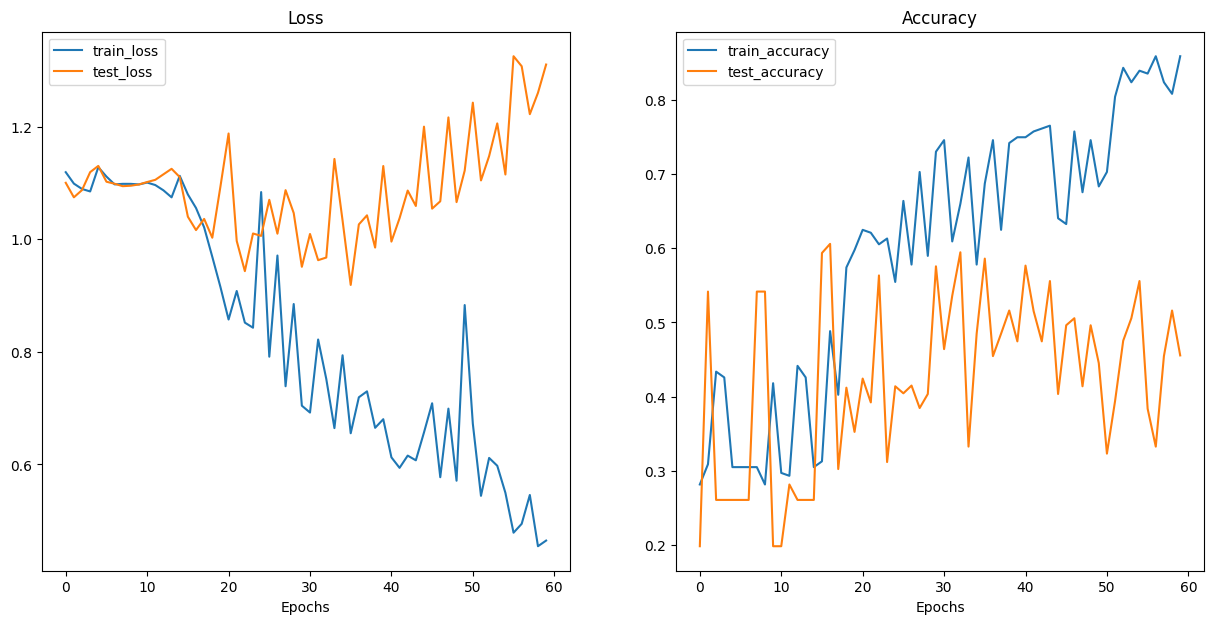

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
1e-3

0.001

In [ ]:
for batch, (X, y) in enumerate(train_dataloader_simple): # Change train_data_simple to train_dataloader_simple
    X, y = X.to(device), y.to(device)
    print(f"Shape of y: {y.shape}")
    print(f"dtype of y: {y.dtype}")
    # ... rest of your training step

Shape of y: torch.Size([32])
dtype of y: torch.int64
Shape of y: torch.Size([32])
dtype of y: torch.int64
Shape of y: torch.Size([32])
dtype of y: torch.int64
Shape of y: torch.Size([32])
dtype of y: torch.int64
Shape of y: torch.Size([32])
dtype of y: torch.int64
Shape of y: torch.Size([32])
dtype of y: torch.int64
Shape of y: torch.Size([32])
dtype of y: torch.int64
Shape of y: torch.Size([1])
dtype of y: torch.int64


## 9 Model 1 : TinyVGG with data augmentation

- Same model as before but with data augmentation

In [ ]:
### 9.1 Create transform with data augmentation

from torchvision import transforms

train_transform_trivial = transforms.Compose(
    [
        transforms.Resize(size = (64,64)),
        transforms.TrivialAugmentWide(num_magnitude_bins=31),# Deafault
        transforms.ToTensor()
    ]
)

test_transform_simple = transforms.Compose(
    [
        transforms.Resize(size = (64,64)),
        transforms.ToTensor()
    ]
)


### 9.2 Craete train and test datasets and datalaoder with data augmentation

In [ ]:
# urn image folders into datasets
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(
    root = train_dir,
    transform=train_transform_trivial,
)

test_data_simple = datasets.ImageFolder(
    root = test_dir,
    transform = test_transform_simple
)

In [ ]:
import os

In [ ]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(NUM_WORKERS)

2


In [ ]:
torch.manual_seed(42)

train_dataloader_augmented = DataLoader(
    dataset = train_data_augmented,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = NUM_WORKERS,
)

test_dataloader_simple = DataLoader(
    dataset = test_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = False,
    num_workers = NUM_WORKERS,
)


### 9.3 Construct and train model1

Augementation Process is extra sauce in here.

In [ ]:
# Create model 1 and send it to target device

torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 100

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(
    params=model_1.parameters(),
    lr = 0.001
)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(
    model = model_1,
    train_dataloader=train_dataloader_augmented,
    test_dataloader = test_dataloader_simple,
    loss_fn = loss_fn,
    optimizer=optimizer,
    epochs = NUM_EPOCHS,
    device = device)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 1.0369 | Train Acc: 0.3906 | Test Loss: 1.0092 | Test Acc: 0.3314
Epoch: 2 | Train Loss: 1.0236 | Train Acc: 0.4180 | Test Loss: 1.0820 | Test Acc: 0.3229
Epoch: 3 | Train Loss: 0.9367 | Train Acc: 0.5195 | Test Loss: 1.0921 | Test Acc: 0.3229
Epoch: 4 | Train Loss: 1.0209 | Train Acc: 0.4492 | Test Loss: 1.0560 | Test Acc: 0.3324
Epoch: 5 | Train Loss: 0.9418 | Train Acc: 0.5820 | Test Loss: 1.0680 | Test Acc: 0.2917
Epoch: 6 | Train Loss: 0.9350 | Train Acc: 0.5859 | Test Loss: 1.0427 | Test Acc: 0.3731
Epoch: 7 | Train Loss: 0.9048 | Train Acc: 0.5781 | Test Loss: 1.0042 | Test Acc: 0.3409
Epoch: 8 | Train Loss: 0.9284 | Train Acc: 0.5977 | Test Loss: 0.9911 | Test Acc: 0.3409
Epoch: 9 | Train Loss: 1.0062 | Train Acc: 0.4648 | Test Loss: 1.0320 | Test Acc: 0.3617
Epoch: 10 | Train Loss: 0.9142 | Train Acc: 0.5977 | Test Loss: 0.9219 | Test Acc: 0.4422
Epoch: 11 | Train Loss: 0.9343 | Train Acc: 0.5938 | Test Loss: 0.9592 | Test Acc: 0.4025
Epoch: 12 | Train L

In [ ]:
model_1_results

{'train_loss': [1.0368976816534996,
  1.0236256942152977,
  0.9366529658436775,
  1.0208927243947983,
  0.9417998567223549,
  0.9349986240267754,
  0.9047917649149895,
  0.9283814281225204,
  1.006164290010929,
  0.91422900557518,
  0.9343491047620773,
  0.8735937923192978,
  0.9318654611706734,
  0.9540345147252083,
  0.9225071370601654,
  0.9430465623736382,
  1.0328384414315224,
  0.8764015585184097,
  0.8610976673662663,
  0.9240563213825226,
  0.9062018990516663,
  0.9944209977984428,
  0.9360232949256897,
  0.8973112627863884,
  0.9129159078001976,
  0.9973294213414192,
  0.9644901007413864,
  0.9578682109713554,
  0.8874666690826416,
  0.8985703587532043,
  0.8026040121912956,
  0.9325018972158432,
  0.8438470922410488,
  0.8787258043885231,
  1.003444828093052,
  0.9823768436908722,
  0.9135718569159508,
  0.9990065395832062,
  0.8948806151747704,
  0.9661565274000168,
  0.9291508495807648,
  0.893626406788826,
  0.9308293163776398,
  0.8772141560912132,
  1.0787256136536598,
 

### 9.4 Plot the loss curves of model1

Loss curves gives a visual representation to the quality of model []

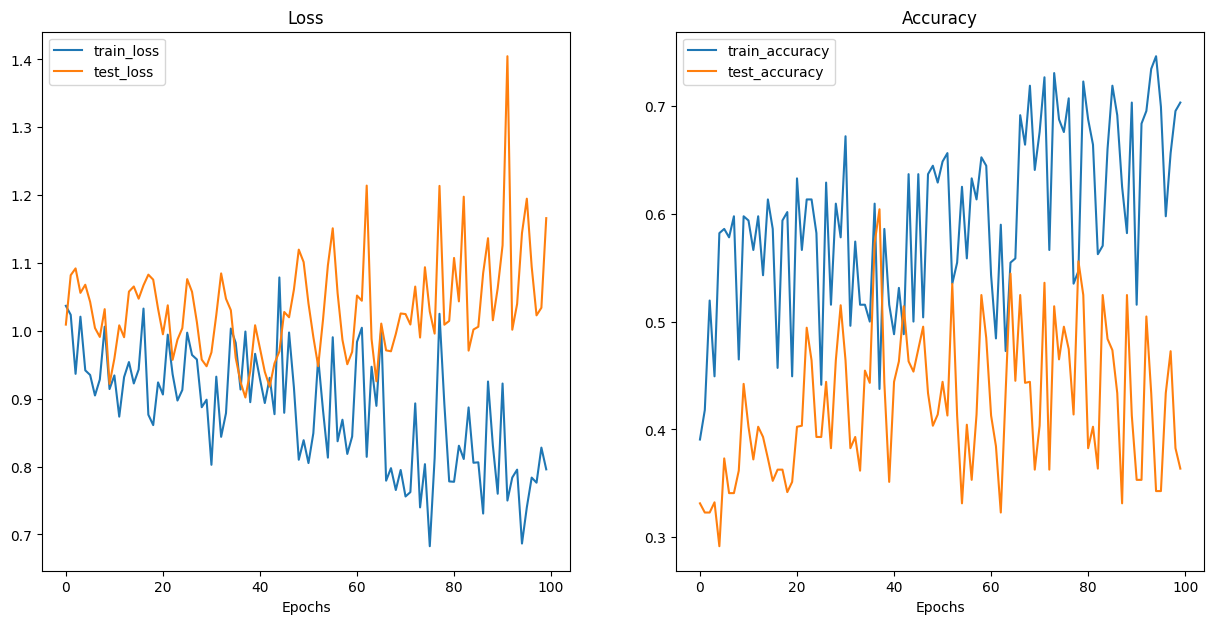

In [ ]:
plot_loss_curves(model_1_results)

## 10 Compare model reuslts

- Imp to compare model after results
- Hard Cording
- Pytorch Tensooboard
- Wrights and base_aliases
- MLFLOW

In [ ]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

model_0_df

train_loss  train_acc  test_loss  test_acc
0     1.119226   0.281250   1.100379  0.197917
1     1.098933   0.308594   1.074577  0.541667
2     1.089396   0.433594   1.087475  0.260417
3     1.085016   0.425781   1.119332  0.260417
4     1.128132   0.304688   1.130367  0.260417
5     1.111424   0.304688   1.102294  0.260417
6     1.097542   0.304688   1.098680  0.260417
7     1.098520   0.304688   1.094368  0.541667
8     1.098472   0.281250   1.095196  0.541667
9     1.097472   0.417969   1.097465  0.197917
10    1.100783   0.296875   1.101747  0.197917
11    1.096364   0.292969   1.105652  0.281250
12    1.086989   0.441406   1.115449  0.260417
13    1.074541   0.425781   1.125213  0.260417
14    1.112767   0.304688   1.110598  0.260417
15    1.079683   0.312500   1.040124  0.593750
16    1.055635   0.488281   1.016384  0.606061
17    1.021168   0.402344   1.036217  0.302083
18    0.968871   0.574219   1.002808  0.411932
19    0.915255   0.597656   1.093736  0.352273
20    0.857511   0.625000   1.187958  0.424242
21    0.908190   0.621094   0.997054  0.392045
22    0.851964   0.605469   0.943431  0.563447
23    0.842926   0.613281   1.010334  0.311553
24    1.083898   0.554688   1.006042  0.413826
25    0.791455   0.664062   1.070180  0.404356
26    0.971181   0.578125   1.009974  0.414773
27    0.738952   0.703125   1.087308  0.384470
28    0.885012   0.589844   1.046639  0.403409
29    0.704405   0.730469   0.951129  0.575758
30    0.692205   0.746094   1.009434  0.464015
31    0.821970   0.609375   0.962920  0.535985
32    0.751899   0.660156   0.967621  0.594697
33    0.664582   0.722656   1.142770  0.332386
34    0.793982   0.578125   1.033417  0.484848
35    0.655458   0.687500   0.918945  0.586174
36    0.719313   0.746094   1.026445  0.454545
37    0.729888   0.625000   1.042588  0.484848
38    0.665098   0.742188   0.985274  0.516098
39    0.680410   0.750000   1.130165  0.474432
40    0.612647   0.750000   0.995901  0.576705
41    0.594001   0.757812   1.037421  0.515152
42    0.615747   0.761719   1.086580  0.474432
43    0.607368   0.765625   1.059192  0.555871
44    0.656874   0.640625   1.200118  0.403409
45    0.708742   0.632812   1.054464  0.496212
46    0.577348   0.757812   1.067530  0.505682
47    0.699191   0.675781   1.216540  0.413826
48    0.571141   0.746094   1.066028  0.496212
49    0.883207   0.683594   1.122038  0.445076
50    0.672276   0.703125   1.242744  0.322917
51    0.544303   0.804688   1.104585  0.393939
52    0.611611   0.843750   1.147790  0.475379
53    0.597693   0.824219   1.205906  0.505682
54    0.549645   0.839844   1.115127  0.555871
55    0.478779   0.835938   1.325234  0.383523
56    0.494532   0.859375   1.307433  0.332386
57    0.545814   0.824219   1.222290  0.454545
58    0.454762   0.808594   1.260221  0.516098
59    0.464795   0.859375   1.310470  0.455492

In [ ]:
model_1_df

train_loss  train_acc  test_loss  test_acc
0     1.036898   0.390625   1.009222  0.331439
1     1.023626   0.417969   1.082048  0.322917
2     0.936653   0.519531   1.092065  0.322917
3     1.020893   0.449219   1.056010  0.332386
4     0.941800   0.582031   1.067990  0.291667
..         ...        ...        ...       ...
95    0.739948   0.699219   1.194815  0.342803
96    0.783752   0.597656   1.094658  0.433712
97    0.776233   0.656250   1.022850  0.472538
98    0.827967   0.695312   1.034050  0.382576
99    0.795896   0.703125   1.166129  0.363636

[100 rows x 4 columns]